In [28]:
# import libraries
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns

## Introduction


A global superstore has given us the task to identify what works best for them in terms of sales and making profit. Using exploratory data analysis (EDA) we will help them identify:

1. Their most and least profitable product categories

2. Segment analysis of sales and profit

3. Geographical analysis of sales and profit

4. Performance trend over the years

Given the insights gained from the EDA, the superstore can choose to remove non-profitable products or invest in marketing efforts for products, segments and geographical areas that are driving their profit.

In [29]:
# import datasets
stores = pd.read_csv('Global_Superstore.csv',  encoding = 'unicode_escape', engine ='python')

In [30]:
# data head
stores.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [31]:
# data info
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [32]:
# data summary statistics
stores.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [65]:
# Calculate the total sales/profit from all years in the dataset
total_sales = stores['Sales'].sum()
print("total_sales = ",total_sales)

total_profit = stores['Profit'].sum()
print("total_profit = ",total_profit)


total_sales =  12642501.909880001
total_profit =  1467457.29128


In [33]:
# make a copy of the data before cleaning
store = stores.copy()

In [34]:
# rename the column names to snake_case without spaces
store.columns = store.columns.str.replace(' ', '_').str.lower()
store.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [37]:
# strings to dates
store['order_date'] = pd.to_datetime(store['order_date'])

store['ship_date'] = pd.to_datetime(store['ship_date'])

In [39]:
store['Order_Month'] = store['order_date'].dt.month 
store['Order_Year'] = store['order_date'].dt.year
store['Order_Day_of_Week'] = store['order_date'].dt.dayofweek

In [40]:
# confirm changes
store[['order_date', 'ship_date']].dtypes

order_date    datetime64[ns]
ship_date     datetime64[ns]
dtype: object

In [41]:
# first order date
print('The first order date is: ' + str(store['order_date'].min()))

# final order date
print('The last order date is: ' + str(store['order_date'].max()))

The first order date is: 2011-01-01 00:00:00
The last order date is: 2014-12-31 00:00:00


In [42]:
# create a new column sales_year
store['sales_year'] = pd.DatetimeIndex(store['order_date']).year

In [43]:
# convert categorical columns data type from object to category
cols = ['ship_mode', 'segment', 'state', 'country', 'region', 'market', 'category', 'sub-category', 'order_priority']

store[cols] = store[cols].astype('category')

In [44]:
# confirm changes
store.dtypes

row_id                        int64
order_id                     object
order_date           datetime64[ns]
ship_date            datetime64[ns]
ship_mode                  category
customer_id                  object
customer_name                object
segment                    category
city                         object
state                      category
country                    category
postal_code                 float64
market                     category
region                     category
product_id                   object
category                   category
sub-category               category
product_name                 object
sales                       float64
quantity                      int64
discount                    float64
profit                      float64
shipping_cost               float64
order_priority             category
Order_Month                   int64
Order_Year                    int64
Order_Day_of_Week             int64
sales_year                  

Analysis and Data Visualization


In [45]:
# group total sales by category from the highest sale.
sales_category = store.groupby('category')['sales'].sum().sort_values(ascending=False)
sales_category

category
Technology         4.744557e+06
Furniture          4.110874e+06
Office Supplies    3.787070e+06
Name: sales, dtype: float64

In [46]:
# group total profits by category
profit_category = store.groupby('category')['profit'].sum().sort_values(ascending=False)
profit_category

category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: profit, dtype: float64

Plot pie charts showing percentage of categories in sales and profit totals:

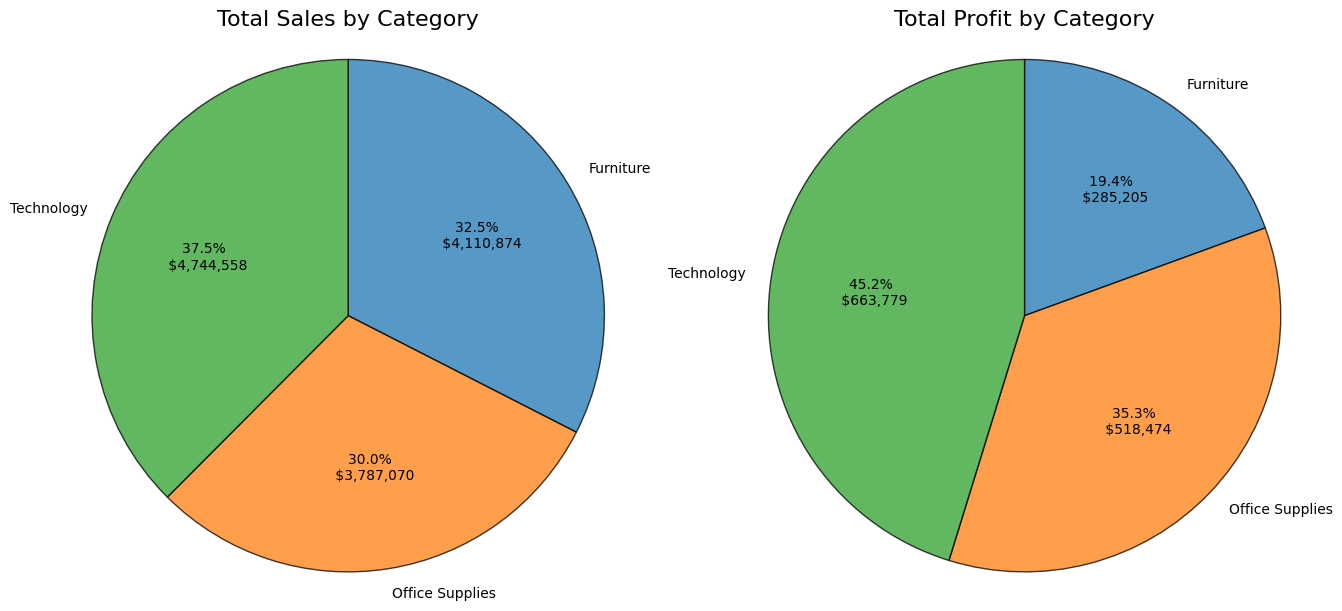

In [47]:
# group total sales by category
sales_category = store.groupby('category')['sales'].sum()

# group total profits by category
profit_category = store.groupby('category')['profit'].sum()


# figure size
plt.figure(figsize=(16,12))

# left total sales pie chart
plt.subplot(1,2,1); # 1 row, 2 columns, the 1st plot.
plt.pie(sales_category.values, labels=sales_category.index, startangle=90, counterclock=False,
        autopct=lambda p:f'{p:.1f}% \n ${p*np.sum(sales_category.values)/100 :,.0f}', 
        wedgeprops={'linewidth': 1, 'edgecolor':'black', 'alpha':0.75});
plt.axis('square')
plt.title('Total Sales by Category',  fontdict={'fontsize':16});

# right total profits pie chart
plt.subplot(1,2,2); # 1 row, 2 columns, the 2nd plot
plt.pie(profit_category.values, labels=profit_category.index, startangle=90, counterclock=False,
        autopct=lambda p:f'{p:.1f}% \n ${p*np.sum(profit_category.values)/100 :,.0f}',
        wedgeprops={'linewidth': 1, 'edgecolor':'black', 'alpha':0.75})
plt.axis('square')
plt.title('Total Profit by Category', fontdict={'fontsize':16})


In [48]:
sales_by_subcategory = store.groupby('sub-category')['sales'].sum().reset_index()
fig = px.bar(sales_by_subcategory, 
             x='sub-category', 
             y='sales', 
             title='Sales Analysis by Sub-Category')
fig.show()

In [49]:
profit_by_subcategory = store.groupby('sub-category')['profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x='sub-category', 
             y='profit', 
             title='Profit Analysis by Sub-Category')
fig.show()

In [50]:
profit_by_month = store.groupby('Order_Month')['profit'].sum().reset_index()
fig = px.line(profit_by_month, 
              x='Order_Month', 
              y='profit', 
              title='Monthly Profit Analysis')
fig.show()

Segment Analysis

C:\Users\imad\AppData\Local\Temp\ipykernel_3540\1413479569.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



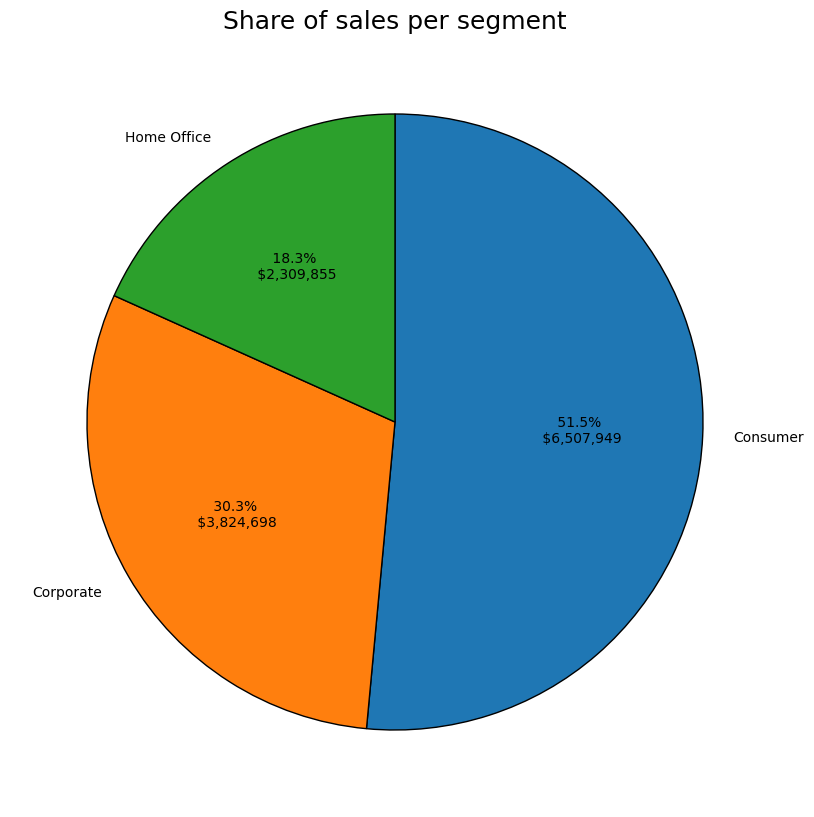

In [51]:
# Which segment contributes the most sales?
segment_counts = store['segment'].value_counts()
segment_counts

sales_by_segment = store.groupby('segment').sum()
sales_by_segment

# # plot a pie chart
plt.figure(figsize = [12,10])

plt.pie(sales_by_segment['sales'], labels=sales_by_segment.index, startangle=90, counterclock=False,
        wedgeprops={'linewidth':1, 'edgecolor':'black', 'alpha':1},
        autopct=lambda p: f'{p: .1f}% \n ${p*np.sum(sales_by_segment.sales)/100 :,.0f}');

plt.title('Share of sales per segment', fontdict={'fontsize':18});

C:\Users\imad\AppData\Local\Temp\ipykernel_3540\4240341434.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



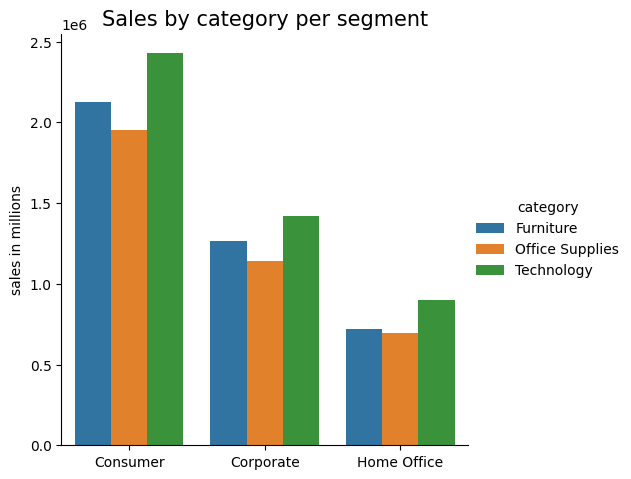

In [52]:
# sales by category per segment

# group by segment and category
from re import L


segment_category = store.groupby(['segment', 'category'], as_index=False).sum()


# plot a barplot of segment by sales using category as the hue

sns.catplot(data=segment_category, x='segment', y='sales', kind='bar', hue='category');
plt.title('Sales by category per segment', fontdict={'fontsize':15});
plt.xlabel(None);
plt.ylabel('sales in millions');

#### Geographical Market Location Analysis

_Global market locations_

**APAC** Asia Pacific Market. encompasses East Asia, South Asia, Southeast Asia, and Oceania.

**EU** European Union. 

**US** United States Market

**LATAM** Latin American Markets

**EMEA** The (Europe, Middle East, Africa) market

**Africa** African market

**Canada** Canada

In [56]:
# profit in different countries
profit_by_market = store.groupby('market', as_index=False).sum().sort_values(by='profit', ascending=False)

# calculate profit margins
profit_by_market['profit_margin'] = profit_by_market['profit'] / profit_by_market['sales']

profit_by_market

C:\Users\imad\AppData\Local\Temp\ipykernel_3540\2510326509.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,market,row_id,postal_code,sales,quantity,discount,profit,shipping_cost,Order_Month,Order_Year,Order_Day_of_Week,sales_year,profit_margin
0,APAC,283802091,0.0,3.585744e+06,41226,1637.530,436000.04900,387165.11,77866,22144565,28433,22144565,0.121593
4,EU,152945000,0.0,2.938089e+06,37773,1031.050,372829.74150,309422.35,70865,20127961,25996,20127961,0.126895
6,US,362717239,551572652.0,2.297201e+06,37873,1561.090,286397.02170,238173.79,72251,20115153,26358,20115153,0.124672
5,LATAM,52988365,0.0,2.164605e+06,38526,1395.158,221643.48708,234138.61,75971,20719523,26949,20719523,0.102394
1,Africa,212025742,0.0,7.837732e+05,10564,718.800,88871.63100,88139.47,31926,9232799,11699,9232799,0.113389
3,EMEA,233028207,0.0,8.061613e+05,11517,986.100,43897.97100,88375.73,35000,10122436,12789,10122436,0.054453
2,Canada,17851051,0.0,6.692817e+04,833,0.000,17817.39000,7405.63,2507,772906,975,772906,0.266217


In [55]:
# profits in different Markets
store.groupby('market')['profit'].sum().sort_values(ascending=False)

market
APAC      436000.04900
EU        372829.74150
US        286397.02170
LATAM     221643.48708
Africa     88871.63100
EMEA       43897.97100
Canada     17817.39000
Name: profit, dtype: float64

C:\Users\imad\AppData\Local\Temp\ipykernel_3540\4200628657.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



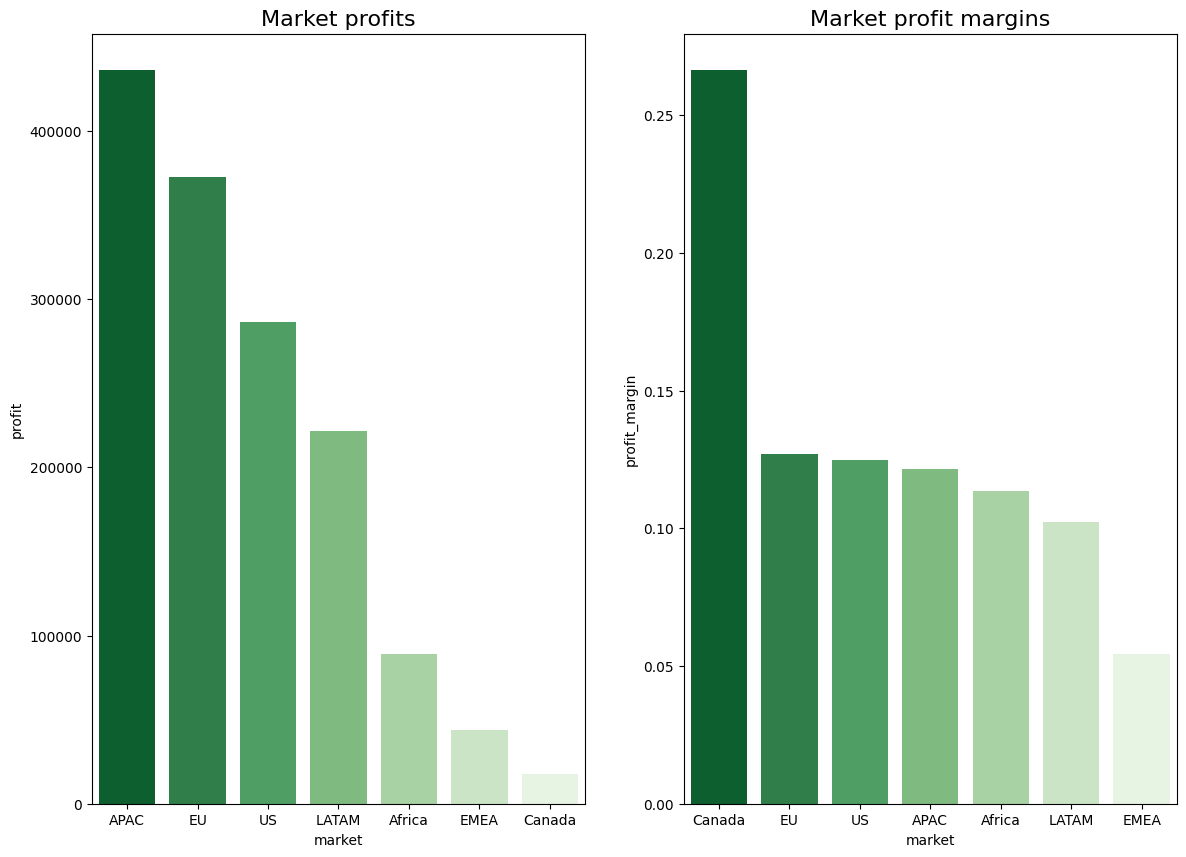

In [57]:
fig, ax =  plt.subplots(figsize=(14,10))

# left profits subplot
plt.subplot(1,2,1)
sns.barplot(x=profit_by_market['market'], y=profit_by_market['profit'], palette='Greens_r', 
            order=profit_by_market.sort_values('profit', ascending=False)['market']);
plt.title('Market profits', fontdict={'fontsize':16});


# right profit margins subplot
plt.subplot(1,2,2)
sns.barplot(x=profit_by_market['market'], y=profit_by_market['profit_margin'],palette='Greens_r', 
            order=profit_by_market.sort_values('profit_margin', ascending=False)['market']);
plt.title('Market profit margins', fontdict={'fontsize':16});


#### Performance trend over the years

In [58]:
# sales trend
sales_trend = store.groupby('sales_year', as_index=False)['sales'].sum()
sales_trend

,sales_year,sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


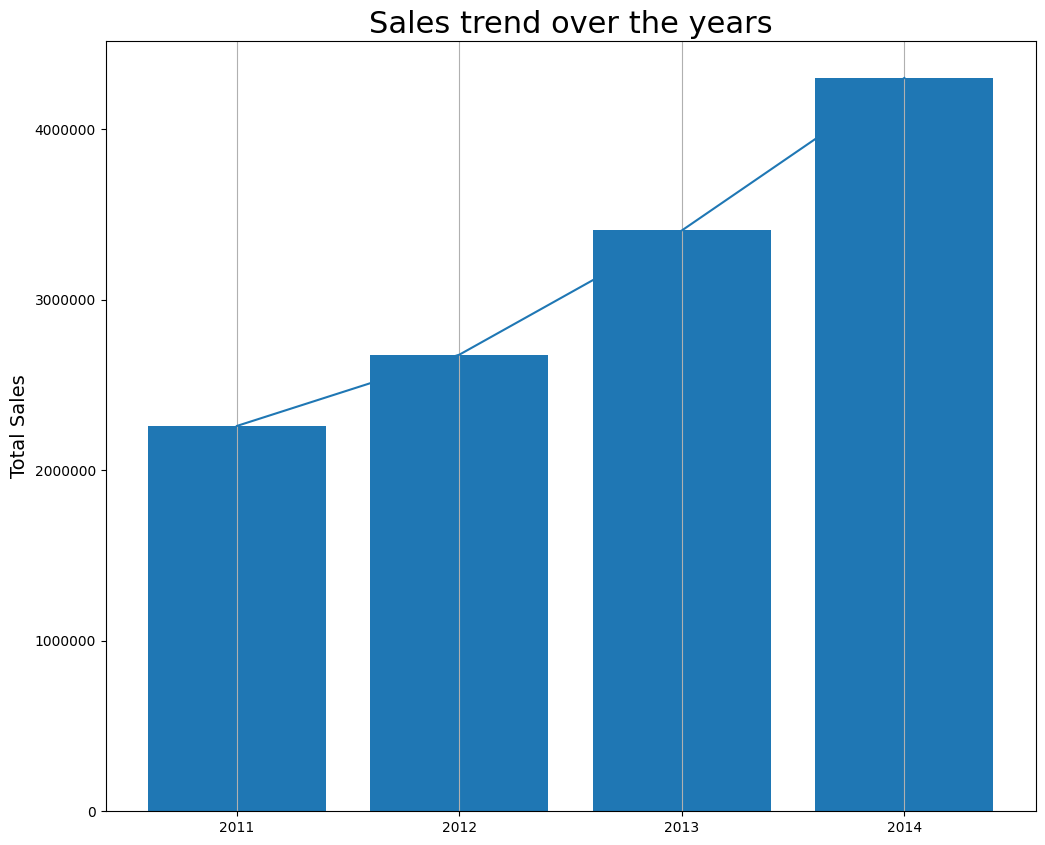

In [60]:
# plot total sales trends
fig, ax = plt.subplots(figsize=(12,10))

ax.bar(x=sales_trend.sales_year, height=sales_trend.sales);
ax.plot(sales_trend.sales_year,sales_trend.sales);
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title('Sales trend over the years', fontsize=22);
plt.ylabel('Total Sales', fontsize=14)
plt.xticks([2011,2012,2013,2014]);
plt.grid(axis='x');

In [61]:
# profit trend
profit_trend = store.groupby('sales_year', as_index=False)['profit'].sum()
profit_trend

,sales_year,profit
0,2011,248940.81154
1,2012,307415.27910
2,2013,406935.23018
3,2014,504165.97046


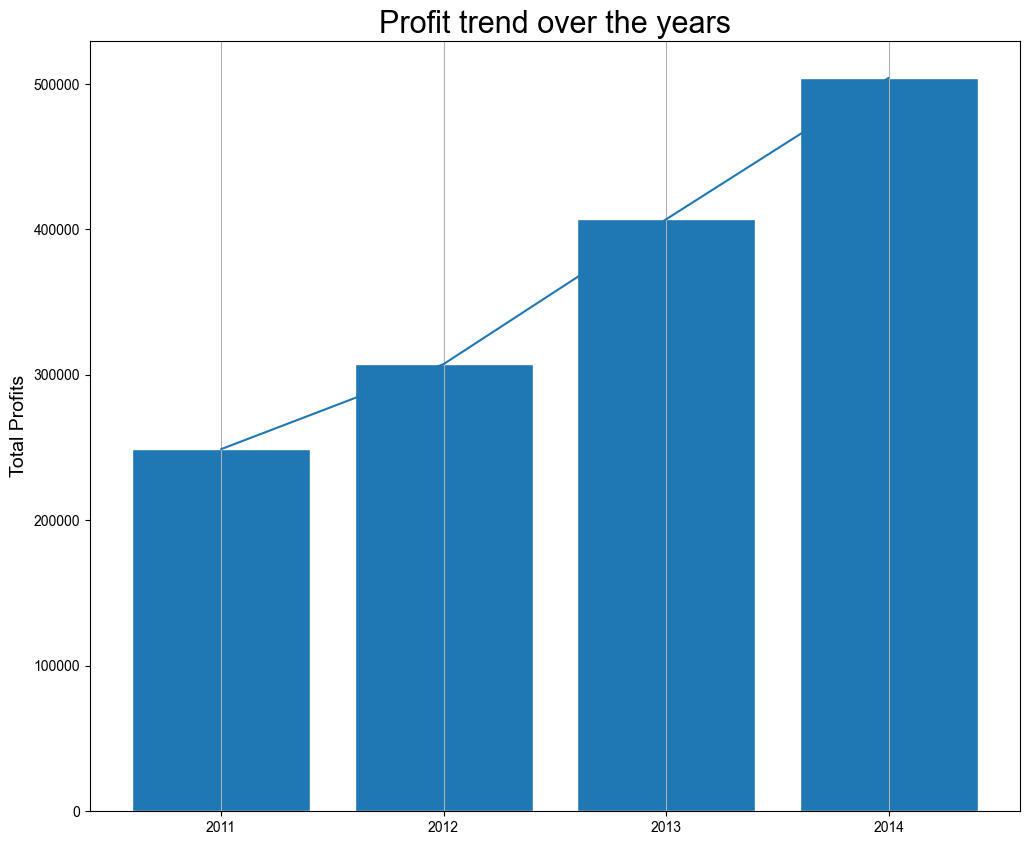

In [62]:
# plot total profit trends
fig, ax = plt.subplots(figsize=(12,10))
sns.set_style('whitegrid')

plt.bar(x=profit_trend.sales_year, height=profit_trend.profit);
plt.plot(profit_trend.sales_year,profit_trend.profit);
plt.title('Profit trend over the years', fontsize=22);
plt.ylabel('Total Profits', fontsize=14)
plt.xticks([2011,2012,2013,2014]);
plt.grid(axis='x');